# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [43]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.spatial import distance
from scipy import stats
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv(r"C:\Users\SANATH\OneDrive\Desktop\marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
(df.isnull().sum()/len(df)*100)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
(df.isnull().sum()/len(df)*100)

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
df[df.duplicated()].sum()

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df.drop(['ID'],axis=1,inplace=True)


In [10]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [13]:
df['Marital_Status'].value_counts()

relationship    1430
Single           786
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [15]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [16]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [17]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [18]:
col_del = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
          'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df=df.drop(columns=col_del,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,4/9/2012,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,8/3/2014,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,21-08-2013,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,10/2/2014,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,19-01-2014,94,5,0,422,19,1,0


In [19]:
df.drop(['Dt_Customer'],axis=1,inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [20]:
df['Age'] = 2023 - df["Year_Birth"]

In [21]:
df.drop(['Year_Birth'], axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42


In [22]:
dfc = df.copy()

### 13. Encode the categorical variables in the dataset

In [23]:
cat = ['Education', 'Marital_Status']
le = LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(le.fit_transform)

In [24]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,66
1,2,0,46344.0,38,5,0,27,6,2,0,69
2,2,1,71613.0,26,4,0,776,21,0,0,58
3,2,1,26646.0,26,6,0,53,8,1,0,39
4,4,1,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [25]:
df1 = df.copy()
normalized_feature = StandardScaler().fit_transform(df1.values)
norm_feat_df = pd.DataFrame(normalized_feature, index=df1.index, columns = df1.columns)

In [26]:
norm_feat_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350527,-1.348829,0.234063,0.310532,0.693232,-0.097812,1.675488,1.319446,-1.264803,0.618045,0.986443
1,-0.350527,-1.348829,-0.234559,-0.380509,-0.131574,-0.097812,-0.962358,-1.157987,1.405806,-0.502731,1.236801
2,-0.350527,0.741384,0.769478,-0.795134,-0.543978,-0.097812,0.280250,0.797881,-1.264803,-0.502731,0.318822
3,-0.350527,0.741384,-1.017239,-0.795134,0.280829,-0.097812,-0.919224,-0.897205,0.070501,-0.502731,-1.266777
4,1.429011,0.741384,0.240221,1.554407,-0.131574,-0.097812,-0.307044,0.537099,0.070501,-0.502731,-1.016420


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [27]:
## step1: calculate the covariance matrix
cov_mat = np.cov(norm_feat_df.T)
cov_mat

array([[ 1.00045147, -0.01457021,  0.12074685, -0.01142336, -0.04084005,
        -0.05088592,  0.09411169,  0.09113856,  0.0547618 ,  0.06501622,
         0.17114208],
       [-0.01457021,  1.00045147,  0.0046655 , -0.00137167,  0.00302309,
        -0.00537107, -0.01935619,  0.0059506 ,  0.04221371, -0.05968763,
        -0.00203431],
       [ 0.12074685,  0.0046655 ,  1.00045147, -0.00397155, -0.55333771,
        -0.0272368 ,  0.66787748,  0.56712852, -0.29348436,  0.28811379,
         0.16186447],
       [-0.01142336, -0.00137167, -0.00397155,  1.00045147, -0.01857202,
         0.01364283,  0.02007471,  0.00752238,  0.01829834, -0.09043257,
         0.01630226],
       [-0.04084005,  0.00302309, -0.55333771, -0.01857202,  1.00045147,
         0.01979394, -0.49930729, -0.31406729,  0.41626432, -0.12690041,
        -0.12395988],
       [-0.05088592, -0.00537107, -0.0272368 ,  0.01364283,  0.01979394,
         1.00045147, -0.03744452, -0.02096109,  0.03178809, -0.01785965,
         0.030

In [28]:
## step2: calculate the eigen values and given vectors
eig_vals, eig_vects = np.linalg.eig(cov_mat)
print('eigein vals:', '\n', eig_vals)
print('\n')
print('eigein vectors:','\n', eig_vects)

eigein vals: 
 [3.19743788 0.1582039  0.33033131 1.25518382 0.57604186 0.69962761
 0.81234783 0.88535512 1.07767021 0.99659123 1.01617535]


eigein vectors: 
 [[-8.10934200e-02  1.65755852e-02  2.47000925e-02  5.52112511e-01
   1.04385603e-01 -1.07281709e-01 -6.80920735e-01 -2.28804115e-01
   3.58063297e-01  1.35916950e-01  5.11659690e-02]
 [ 1.72829367e-02 -2.45149658e-04  2.50392171e-03  8.32514642e-02
   1.50323812e-02  1.54674464e-01 -1.00331772e-01 -2.52706214e-01
  -3.19425047e-01 -5.63717855e-01  6.89113145e-01]
 [-4.54729146e-01  1.10098350e-01 -7.36892742e-01  1.10552861e-01
  -3.95510448e-01 -2.34022911e-01  2.66790193e-02  7.99063228e-02
  -7.27766026e-02 -3.36946100e-02  3.38100741e-02]
 [ 5.43377454e-03  3.64204293e-02 -1.60103745e-02  1.10172307e-01
  -5.30900834e-02  1.48760250e-01 -1.77824148e-02 -4.67923665e-01
  -6.47981936e-01  5.64582321e-01 -5.83012048e-02]
 [ 3.78023484e-01 -9.71896699e-02 -5.19301941e-01  3.41113919e-02
   4.50156083e-01 -8.53947210e-02  3.104256

In [29]:
## Scree plot
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('\n')
print('Cummulative Variance: ',cum_var_exp)

Explained Variance:  [29.054499930848905, 11.405612718764855, 9.792580888169283, 9.23378900112245, 9.055831894538452, 8.045050825968222, 7.381647735020182, 6.357380864716687, 5.234381058283287, 3.001656785315957, 1.4375682972517285]


Cummulative Variance:  [ 29.05449993  40.46011265  50.25269354  59.48648254  68.54231443
  76.58736526  83.96901299  90.32639386  95.56077492  98.5624317
 100.        ]


In [30]:
cum_var_exp.shape

(11,)

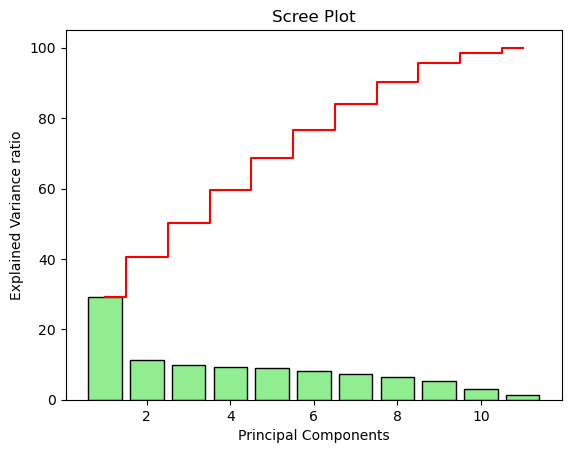

In [32]:
## scree plot
plt.bar(range(1,len(var_exp)+1),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree Plot')

plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [33]:
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(norm_feat_df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.955618,-0.108077,-0.373361,1.127306,-0.780136,-0.274046,-1.182249,-0.364338
1,-1.513599,0.997303,-0.410274,0.969169,-0.488887,1.385206,-0.707487,-0.338797
2,1.313208,-0.290223,0.326646,-0.696521,0.788293,0.976933,0.050120,0.056151
3,-1.758019,-1.121067,-0.221100,-0.789217,0.644830,0.210865,0.578990,0.244709
4,0.058398,0.579276,0.915867,-0.779536,-0.793376,-1.249352,1.308788,0.877959


In [34]:
from sklearn.cluster import KMeans
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [35]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors})

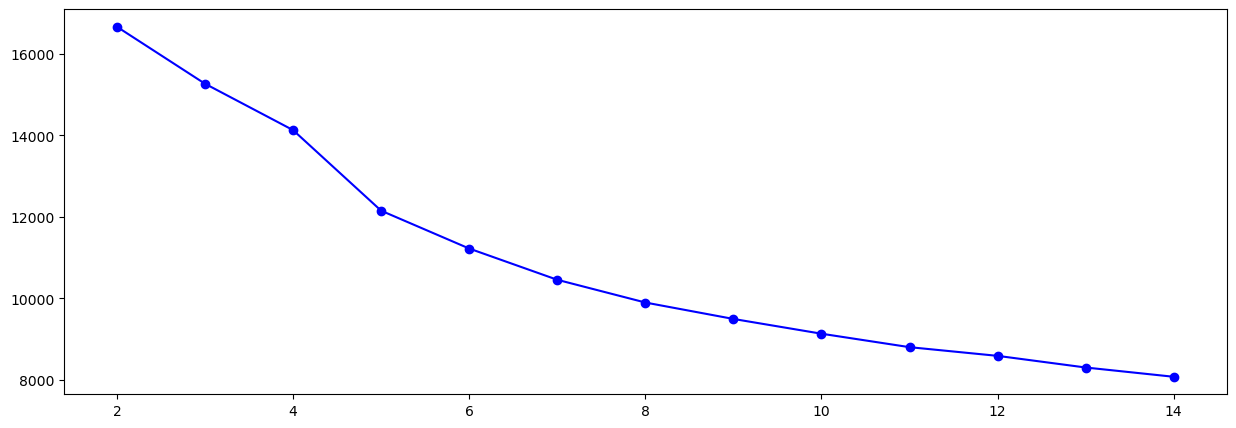

In [36]:
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [38]:
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [39]:
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.955618,-0.108077,-0.373361,1.127306,-0.780136,-0.274046,-1.182249,-0.364338,0
1,-1.513599,0.997303,-0.410274,0.969169,-0.488887,1.385206,-0.707487,-0.338797,1
2,1.313208,-0.290223,0.326646,-0.696521,0.788293,0.976933,0.050120,0.056151,0
3,-1.758019,-1.121067,-0.221100,-0.789217,0.644830,0.210865,0.578990,0.244709,1
4,0.058398,0.579276,0.915867,-0.779536,-0.793376,-1.249352,1.308788,0.877959,2


In [40]:
kmeans_df['Label'].value_counts()

1    985
2    712
0    519
Name: Label, dtype: int64

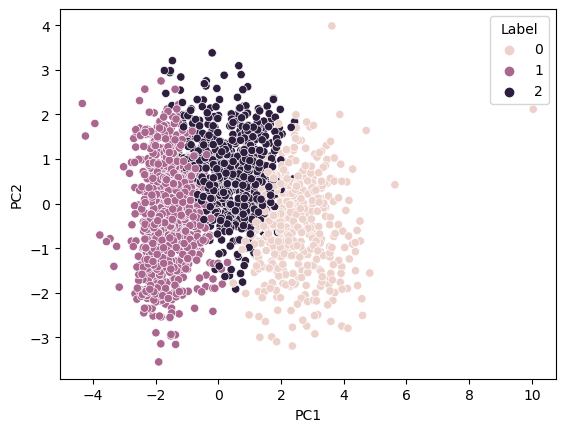

In [41]:
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

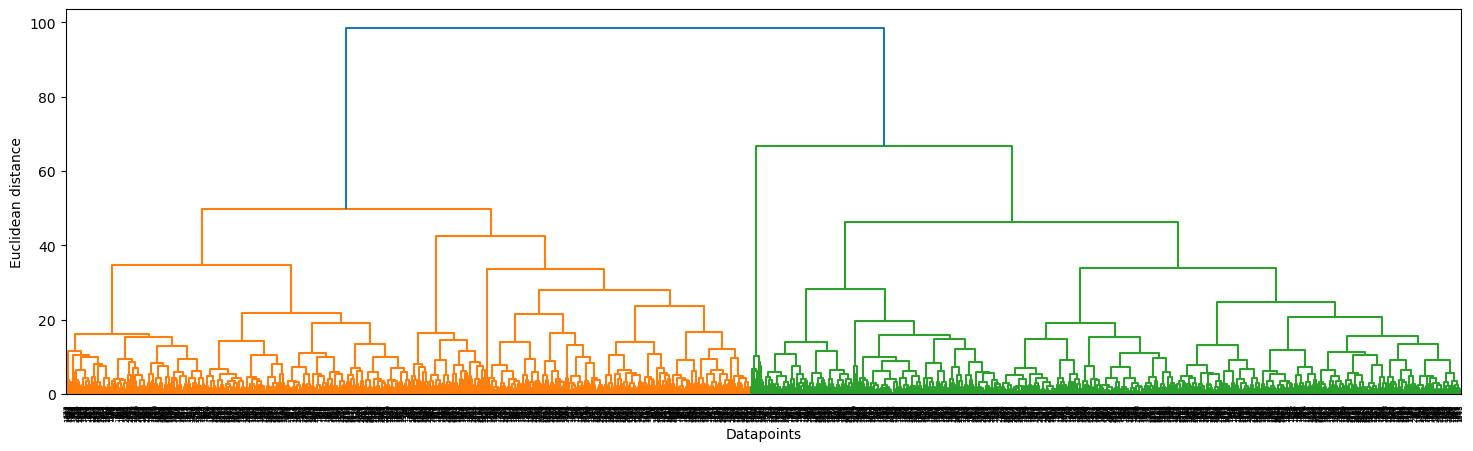

In [42]:
plt.figure(figsize=[18,5])
merg = linkage(normalized_feature,method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [45]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(norm_feat_df)
    labels = hier.fit_predict(norm_feat_df)
    print(i,silhouette_score(norm_feat_df, labels))

2 0.19828651112932277
3 0.20765708553608386
4 0.14098576070161498
5 0.1219501685308192
6 0.12934171885085127
7 0.12730056695623768
8 0.10455739502048804
9 0.10599638386594584
10 0.11027999819720745
11 0.11413956824435179
12 0.10703732083491828
13 0.10627152736232323
14 0.10132092908942784


In [47]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hie_cluster_model = hie_cluster.fit(norm_feat_df)

In [48]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head()

,Labels
0,0
1,1
2,0
3,1
4,1


In [49]:
df_hier = df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,2,0,58138.0,58,7,0,1617,25,0,1,66,0.0
1,2,0,46344.0,38,5,0,27,6,2,0,69,1.0
2,2,1,71613.0,26,4,0,776,21,0,0,58,0.0
3,2,1,26646.0,26,6,0,53,8,1,0,39,1.0
4,4,1,58293.0,94,5,0,422,19,1,0,42,1.0


### Visualization and Interpretation of results

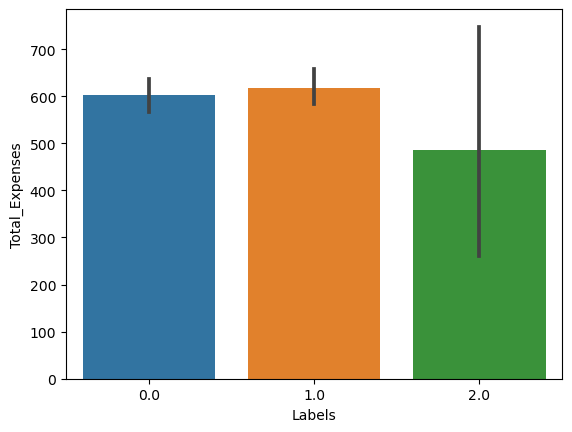

In [50]:
sns.barplot(df_hier['Labels'], df_hier['Total_Expenses'])
plt.show()

- The total expense is higher for cluster 1.0

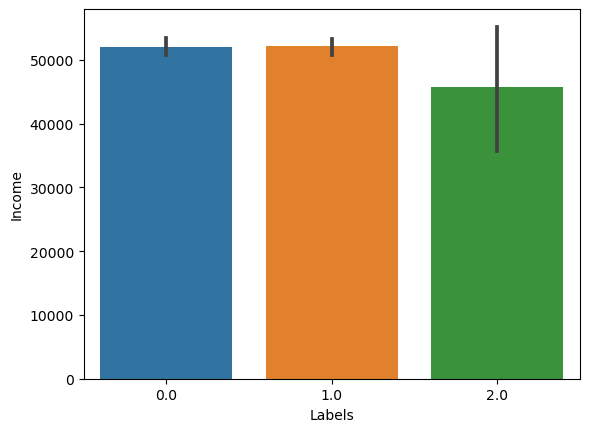

In [51]:
sns.barplot(df_hier['Labels'], df_hier['Income'])
plt.show()

- The Income is also higher for cluster 1.0 than cluster 0 and 2.0

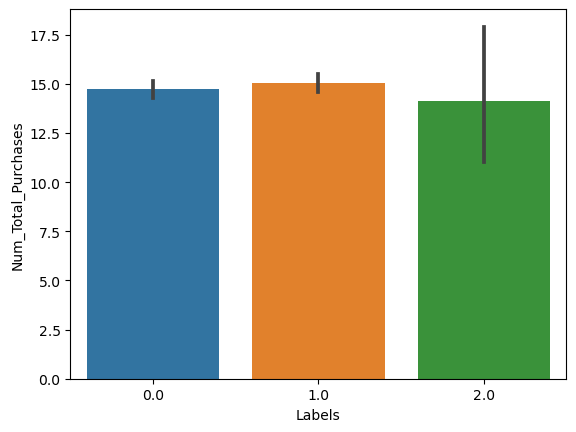

In [52]:
sns.barplot(df_hier['Labels'], df_hier['Num_Total_Purchases'])
plt.show()

- Cluster 1.0 have high number of purchases than others.

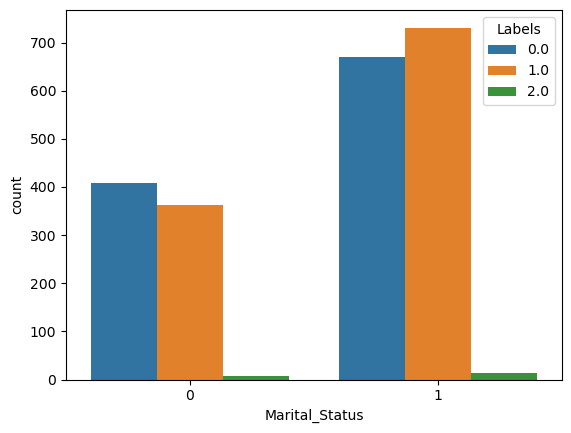

In [53]:
sns.countplot(df_hier['Marital_Status'], hue='Labels',data=df_hier)
plt.show()

- Most number of Married customers are in clusters 0 and 1.0
- The Marital status data of customers in Cluster 2.0 is mostly missing, hence it has less people in both married and unmarried groups.

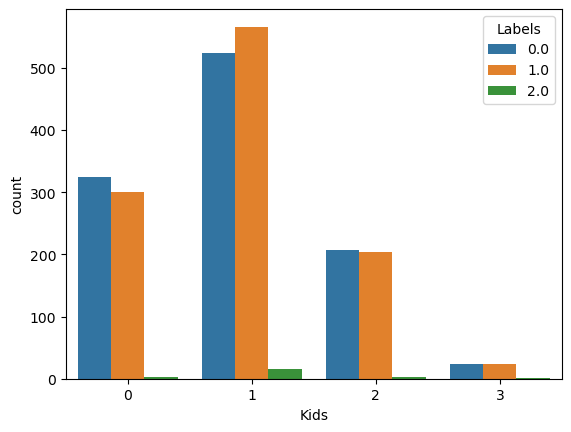

In [54]:
sns.countplot(df_hier['Kids'], hue='Labels',data=df_hier)
plt.show()

- Most number of customers in cluster 0 and 1.0 have only 1 child.
- Number of customers having 3 kids are less.

-----
## Happy Learning
-----